In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')

from fredapi import Fred

In [9]:
fred_key = '3d7f53c6d7149a1e6ad2b054204d64db'

# 1. Create the Fred object

In [10]:
fred = Fred(api_key=fred_key)

# 2. Search for econmic data

In [11]:
sp_search = fred.search('S&P', order_by = 'popularity' )
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-13,2023-08-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-11 09:10:02-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-13,2023-08-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-13,2023-08-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-11 09:10:07-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-08-13,2023-08-13,S&P 500,2013-08-12,2023-08-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-11 19:10:58-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-13,2023-08-13,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...


# 3. Pull the raw data

In [12]:
sp500 = fred.get_series(series_id = 'SP500')
sp500

2013-08-12    1689.47
2013-08-13    1694.16
2013-08-14    1685.39
2013-08-15    1661.32
2013-08-16    1655.83
               ...   
2023-08-07    4518.44
2023-08-08    4499.38
2023-08-09    4467.71
2023-08-10    4468.83
2023-08-11    4464.05
Length: 2610, dtype: float64

<AxesSubplot:title={'center':'S&P 500'}>

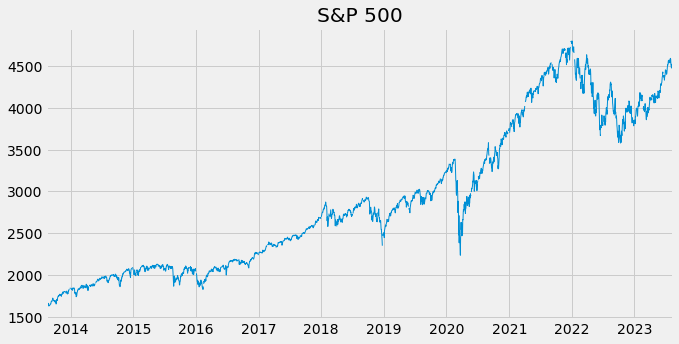

In [13]:
sp500.plot(figsize= (10,5), title = 'S&P 500', lw = 1)

# 4. Pull and join multiple data

In [14]:
uemp_result = fred.search('unemployement')
uemp_result

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:45:34-05:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2023-08-13,2023-08-13,Continued Claims (Insured Unemployment),1967-01-07,2023-07-29,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-08-10 07:33:03-05:00,74,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-08-13,2023-08-13,Continued Claims (Insured Unemployment),1967-01-07,2023-07-29,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-08-10 07:33:03-05:00,41,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-08-13,2023-08-13,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,64,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOFRURN,MOFRURN,2023-08-13,2023-08-13,"Unemployment Rate in Franklin County, MO",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:22:39-05:00,5,These data come from the Current Population Su...
WABENT0URN,WABENT0URN,2023-08-13,2023-08-13,"Unemployment Rate in Benton County, WA",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:10:11-05:00,5,These data come from the Current Population Su...
VALOUD5URN,VALOUD5URN,2023-08-13,2023-08-13,"Unemployment Rate in Loudoun County, VA",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:10:04-05:00,5,These data come from the Current Population Su...


In [15]:
unrate = fred.get_series('UNRATE')

In [16]:
# unrate.plot()
# Dari data the FED yang didapat,
# filter data dengan kondisi unemployement rate 
# pada setiap stat dan filter bulanan

In [17]:
unemp_df = fred.search('unemployement rate state', filter = ('frequency','Monthly') )

In [18]:
#filter satuan dan seasonally adjusted

In [19]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [20]:
unemp_df.shape

(165, 15)

In [21]:
#filter title dengan "Unemployement Rate"
unemp_df['title'].str.contains('Unemployment Rate in')


series id
UNRATE              False
LNS14000006         False
U6RATE              False
CAUR                 True
M0892AUSM156SNBR    False
                    ...  
LNS13023570         False
LNS13026511         False
LNS13008517         False
LNS14000093         False
LNS14023705         False
Name: title, Length: 165, dtype: bool

In [22]:
#Lokasi dimana deskripsi "Unemployment rate" = True
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df.shape

(60, 15)

In [23]:
# Mendapatkan series dari setiap data dengan looping get_series
# dengan index menunjukan unique value series ID
unemp_df.index

Index(['CAUR', 'FLUR', 'TXUR', 'NYUR', 'OHUR', 'ALUR', 'MAUR', 'ILUR', 'PAUR',
       'MIUR', 'COUR', 'NJUR', 'WIUR', 'NCUR', 'GAUR', 'SCUR', 'MOUR', 'TNUR',
       'ORUR', 'AZUR', 'MNUR', 'KYUR', 'WAUR', 'WVUR', 'INUR', 'VAUR', 'ARUR',
       'MDUR', 'UTUR', 'IAUR', 'OKUR', 'AKUR', 'NVUR', 'LAUR',
       'LASMT261982000000003', 'NMUR', 'CTUR', 'MTUR', 'NDUR', 'DEUR', 'MSUR',
       'DCUR', 'NEUR', 'KSUR', 'PRUR', 'IDUR', 'SDUR', 'LASMT391746000000003',
       'RIUR', 'HIUR', 'WYUR', 'MEUR', 'NHUR', 'VTUR', 'CMWRUR', 'CNERUR',
       'CSOUUR', 'USAURAMS', 'CNEWUR', 'CWSTUR'],
      dtype='object', name='series id')

In [24]:
len(unemp_df.index)

60

In [25]:
all_result = []
for series_id in unemp_df.index:
    result = fred.get_series(series_id)
    result = result.to_frame(name=series_id)
    all_result.append(result)

In [26]:
all_data = pd.concat(all_result, axis = 1)

In [27]:
all_data

,CAUR,FLUR,TXUR,NYUR,OHUR,ALUR,MAUR,ILUR,PAUR,MIUR,...,WYUR,MEUR,NHUR,VTUR,CMWRUR,CNERUR,CSOUUR,USAURAMS,CNEWUR,CWSTUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.0,9.9,...,4.1,8.7,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.1,9.9,...,4.1,8.7,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,6.6,10.5,6.6,8.1,9.9,...,4.1,8.6,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,6.5,10.3,6.6,8.1,9.8,...,4.0,8.6,6.5,8.6,6.7,9.5,6.8,NaN,9.4,8.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,6.4,10.1,6.6,8.1,9.6,...,3.9,8.5,6.5,8.5,6.6,9.5,6.7,NaN,9.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,4.4,2.6,4.0,4.2,3.9,2.5,3.7,4.5,4.4,4.3,...,3.8,2.8,2.7,2.8,3.5,3.9,3.3,NaN,3.5,4.1
2023-03-01,4.4,2.6,4.0,4.1,3.8,2.3,3.5,4.4,4.2,4.1,...,3.7,2.6,2.4,2.7,3.4,3.8,3.3,NaN,3.4,4.0
2023-04-01,4.5,2.6,4.0,4.0,3.7,2.2,3.1,4.2,4.1,3.8,...,3.5,2.4,2.1,2.4,3.3,3.7,3.3,NaN,3.2,4.0
2023-05-01,4.5,2.6,4.1,3.9,3.6,2.2,2.8,4.1,4.0,3.7,...,3.3,2.4,1.9,2.1,3.2,3.6,3.3,NaN,3.0,4.0


In [28]:
all_data

,CAUR,FLUR,TXUR,NYUR,OHUR,ALUR,MAUR,ILUR,PAUR,MIUR,...,WYUR,MEUR,NHUR,VTUR,CMWRUR,CNERUR,CSOUUR,USAURAMS,CNEWUR,CWSTUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.0,9.9,...,4.1,8.7,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.1,9.9,...,4.1,8.7,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,6.6,10.5,6.6,8.1,9.9,...,4.1,8.6,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,6.5,10.3,6.6,8.1,9.8,...,4.0,8.6,6.5,8.6,6.7,9.5,6.8,NaN,9.4,8.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,6.4,10.1,6.6,8.1,9.6,...,3.9,8.5,6.5,8.5,6.6,9.5,6.7,NaN,9.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,4.4,2.6,4.0,4.2,3.9,2.5,3.7,4.5,4.4,4.3,...,3.8,2.8,2.7,2.8,3.5,3.9,3.3,NaN,3.5,4.1
2023-03-01,4.4,2.6,4.0,4.1,3.8,2.3,3.5,4.4,4.2,4.1,...,3.7,2.6,2.4,2.7,3.4,3.8,3.3,NaN,3.4,4.0
2023-04-01,4.5,2.6,4.0,4.0,3.7,2.2,3.1,4.2,4.1,3.8,...,3.5,2.4,2.1,2.4,3.3,3.7,3.3,NaN,3.2,4.0
2023-05-01,4.5,2.6,4.1,3.9,3.6,2.2,2.8,4.1,4.0,3.7,...,3.3,2.4,1.9,2.1,3.2,3.6,3.3,NaN,3.0,4.0


In [29]:
#cara meraplace kolom, dengan list
state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
state

{'CAUR': ' California',
 'FLUR': ' Florida',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'OHUR': ' Ohio',
 'ALUR': ' Alabama',
 'MAUR': ' Massachusetts',
 'ILUR': ' Illinois',
 'PAUR': ' Pennsylvania',
 'MIUR': ' Michigan',
 'COUR': ' Colorado',
 'NJUR': ' New Jersey',
 'WIUR': ' Wisconsin',
 'NCUR': ' North Carolina',
 'GAUR': ' Georgia',
 'SCUR': ' South Carolina',
 'MOUR': ' Missouri',
 'TNUR': ' Tennessee',
 'ORUR': ' Oregon',
 'AZUR': ' Arizona',
 'MNUR': ' Minnesota',
 'KYUR': ' Kentucky',
 'WAUR': ' Washington',
 'WVUR': ' West Virginia',
 'INUR': ' Indiana',
 'VAUR': ' Virginia',
 'ARUR': ' Arkansas',
 'MDUR': ' Maryland',
 'UTUR': ' Utah',
 'IAUR': ' Iowa',
 'OKUR': ' Oklahoma',
 'AKUR': ' Alaska',
 'NVUR': ' Nevada',
 'LAUR': ' Louisiana',
 'LASMT261982000000003': ' Detroit-Warren-Dearborn, MI (MSA)',
 'NMUR': ' New Mexico',
 'CTUR': ' Connecticut',
 'MTUR': ' Montana',
 'NDUR': ' North Dakota',
 'DEUR': ' Delaware',
 'MSUR': ' Mississippi',
 'DCUR': ' the District of Columbia'

In [30]:
#Merubah kolom menjadi list, mengambil satu per satu menjadi list
[c for c in all_data.columns]

['CAUR',
 'FLUR',
 'TXUR',
 'NYUR',
 'OHUR',
 'ALUR',
 'MAUR',
 'ILUR',
 'PAUR',
 'MIUR',
 'COUR',
 'NJUR',
 'WIUR',
 'NCUR',
 'GAUR',
 'SCUR',
 'MOUR',
 'TNUR',
 'ORUR',
 'AZUR',
 'MNUR',
 'KYUR',
 'WAUR',
 'WVUR',
 'INUR',
 'VAUR',
 'ARUR',
 'MDUR',
 'UTUR',
 'IAUR',
 'OKUR',
 'AKUR',
 'NVUR',
 'LAUR',
 'LASMT261982000000003',
 'NMUR',
 'CTUR',
 'MTUR',
 'NDUR',
 'DEUR',
 'MSUR',
 'DCUR',
 'NEUR',
 'KSUR',
 'PRUR',
 'IDUR',
 'SDUR',
 'LASMT391746000000003',
 'RIUR',
 'HIUR',
 'WYUR',
 'MEUR',
 'NHUR',
 'VTUR',
 'CMWRUR',
 'CNERUR',
 'CSOUUR',
 'USAURAMS',
 'CNEWUR',
 'CWSTUR']

In [31]:
#Mapping dari dictionary menjadi list
[state[c] for c in all_data.columns]

[' California',
 ' Florida',
 ' Texas',
 ' New York',
 ' Ohio',
 ' Alabama',
 ' Massachusetts',
 ' Illinois',
 ' Pennsylvania',
 ' Michigan',
 ' Colorado',
 ' New Jersey',
 ' Wisconsin',
 ' North Carolina',
 ' Georgia',
 ' South Carolina',
 ' Missouri',
 ' Tennessee',
 ' Oregon',
 ' Arizona',
 ' Minnesota',
 ' Kentucky',
 ' Washington',
 ' West Virginia',
 ' Indiana',
 ' Virginia',
 ' Arkansas',
 ' Maryland',
 ' Utah',
 ' Iowa',
 ' Oklahoma',
 ' Alaska',
 ' Nevada',
 ' Louisiana',
 ' Detroit-Warren-Dearborn, MI (MSA)',
 ' New Mexico',
 ' Connecticut',
 ' Montana',
 ' North Dakota',
 ' Delaware',
 ' Mississippi',
 ' the District of Columbia',
 ' Nebraska',
 ' Kansas',
 ' Puerto Rico',
 ' Idaho',
 ' South Dakota',
 ' Cleveland-Elyria, OH (MSA)',
 ' Rhode Island',
 ' Hawaii',
 ' Wyoming',
 ' Maine',
 ' New Hampshire',
 ' Vermont',
 ' Midwest Census Region',
 ' Northeast Census Region',
 ' South Census Region',
 ' the United States (DISCONTINUED)',
 ' New England Census Division',
 ' West 

In [32]:
# Merubah nama kolom data frame
all_data.columns = [state[c] for c in all_data.columns]

In [33]:
all_data

,California,Florida,Texas,New York,Ohio,Alabama,Massachusetts,Illinois,Pennsylvania,Michigan,...,Wyoming,Maine,New Hampshire,Vermont,Midwest Census Region,Northeast Census Region,South Census Region,the United States (DISCONTINUED),New England Census Division,West Census Region
1976-01-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.0,9.9,...,4.1,8.7,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.1,9.9,...,4.1,8.7,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,6.6,10.5,6.6,8.1,9.9,...,4.1,8.6,6.5,8.6,6.8,9.6,6.9,NaN,9.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,6.5,10.3,6.6,8.1,9.8,...,4.0,8.6,6.5,8.6,6.7,9.5,6.8,NaN,9.4,8.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,6.4,10.1,6.6,8.1,9.6,...,3.9,8.5,6.5,8.5,6.6,9.5,6.7,NaN,9.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,4.4,2.6,4.0,4.2,3.9,2.5,3.7,4.5,4.4,4.3,...,3.8,2.8,2.7,2.8,3.5,3.9,3.3,NaN,3.5,4.1
2023-03-01,4.4,2.6,4.0,4.1,3.8,2.3,3.5,4.4,4.2,4.1,...,3.7,2.6,2.4,2.7,3.4,3.8,3.3,NaN,3.4,4.0
2023-04-01,4.5,2.6,4.0,4.0,3.7,2.2,3.1,4.2,4.1,3.8,...,3.5,2.4,2.1,2.4,3.3,3.7,3.3,NaN,3.2,4.0
2023-05-01,4.5,2.6,4.1,3.9,3.6,2.2,2.8,4.1,4.0,3.7,...,3.3,2.4,1.9,2.1,3.2,3.6,3.3,NaN,3.0,4.0


<AxesSubplot:>

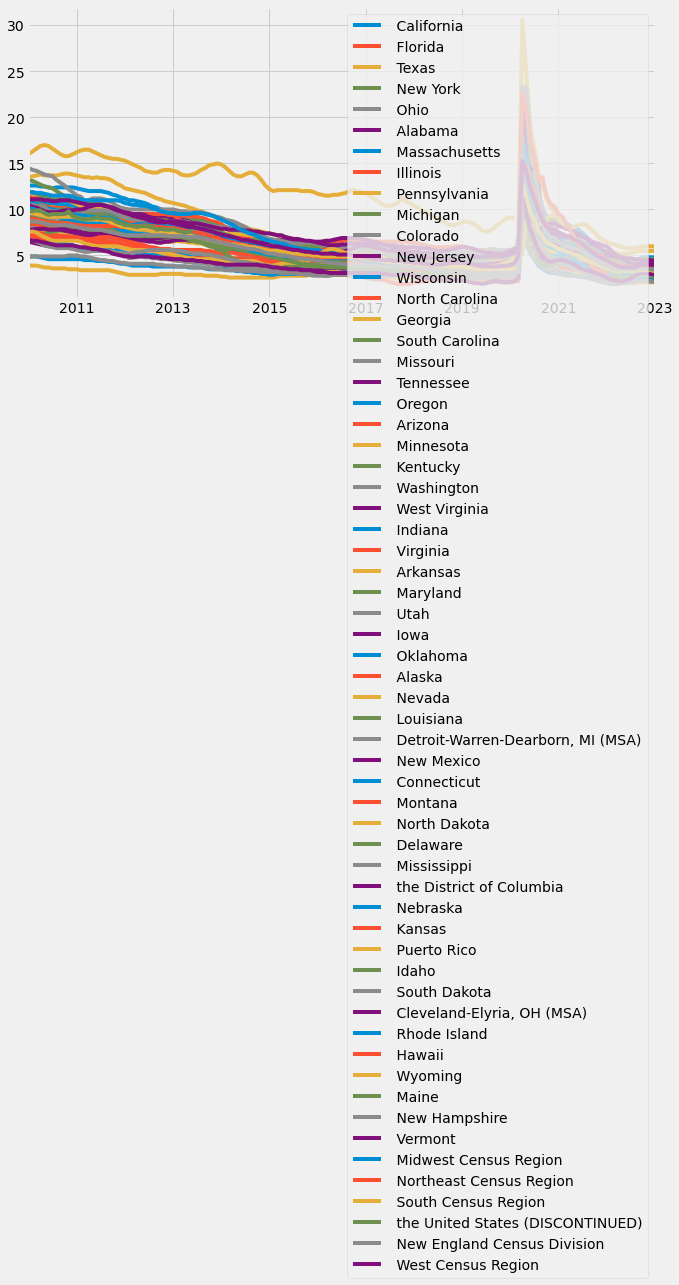

In [63]:
all_data_2000 = all_data.loc[all_data.index >= '2000-01-01']
all_data_2000.plot(kind = 'line', figsize = (10,5), xlim = ('2010-01-01','2023-01-01' ))

## Pull July 2023 unemployemt Data

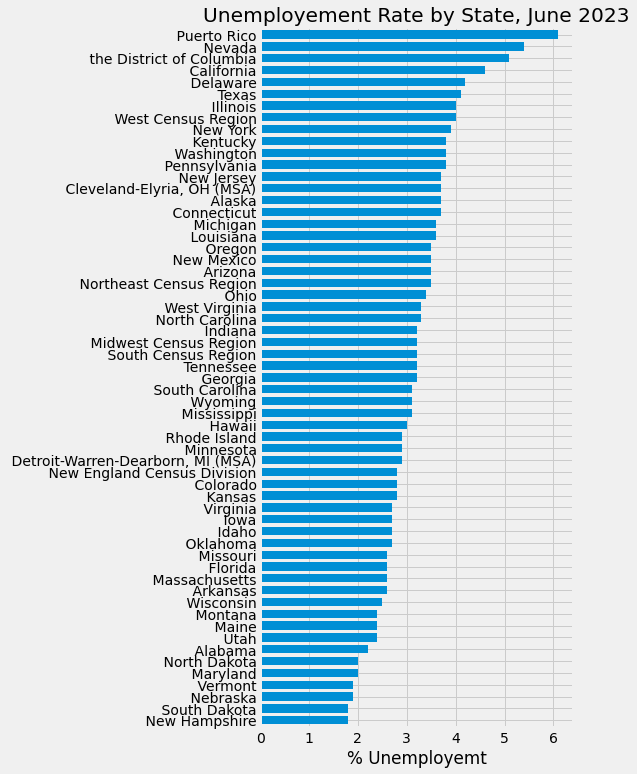

In [105]:
ax = all_data.loc[all_data.index == '2023-06-01'].T \
    .sort_values('2023-06-01').dropna() \
    .plot(kind = 'barh', figsize = (5, 12), width = 0.7,
         title = 'Unemployement Rate by State, June 2023',xlabel = '% Unemployemt')
ax.legend().remove()
plt.show()

## Pull Participation Rate

In [148]:
participation_df = fred.search('participation rate state', filter = ('frequency','Monthly') )
part_df= participation_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [158]:
part_df_state = part_df['title'].str.replace('Participation Rate for', '').to_dict()

In [ ]:
all_result_part = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_result.append(results)
    
part_state = pd.concat(all_result_part, axis = 1)

In [ ]:
part_state.columns = [id_to_state[c] for c in part_state.columns]

In [35]:
#Cara filter index menggunakan query
uemp_result.loc[uemp_result.index.str.contains('UNRATE') == True]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:45:34-05:00,54,The unemployment rate represents the number of...
UNRATEMD,UNRATEMD,2023-08-13,2023-08-13,FOMC Summary of Economic Projections for the C...,2023-01-01,2025-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-06-14 14:08:03-05:00,36,Projections for the unemployment rate are for ...
UNRATECTM,UNRATECTM,2023-08-13,2023-08-13,FOMC Summary of Economic Projections for the C...,2023-01-01,2025-01-01,Annual,A,"Fourth Quarter, Percent","Fourth Qtr., %",Not Seasonally Adjusted,NSA,2023-06-14 14:08:06-05:00,21,Projections for the unemployment rate are for ...
UNRATERH,UNRATERH,2023-08-13,2023-08-13,FOMC Summary of Economic Projections for the C...,2023-01-01,2025-01-01,Annual,A,"Fourth Quarter, Percent","Fourth Qtr., %",Not Seasonally Adjusted,NSA,2023-06-14 14:08:07-05:00,11,Projections for the unemployment rate are for ...


In [36]:
#Cek NA, jumlah na berdasarkan row dan hilangkan NA
unemp_result.isna().sum(axis=1)

NameError: name 'unemp_result' is not defined

In [ ]:
#Unemployement per daerah
unemp_state = unemp_result.drop('UNRATE', axis = 1)
unemp_state

In [ ]:
unemp_state.isna().sum(axis=1).plot()

In [ ]:
unemp_state = unemp_state.dropna()
unemp_state

###### Insigth :
###### Sebelum 1980, nilai NA tinggi, maka NA akan dihilangkan

In [ ]:
px.line(unemp_state)

In [ ]:
#Penerapan concat
# source :https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

In [ ]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

In [ ]:
pd.concat([df1,df4], axis=0)